imported pandas as pd

In [1]:
import pandas as pd

used pandas to read from Chatlogs where Average is 1 second

In [4]:
df = pd.read_csv('C:/Users/Gustavo Chinchayan/Documents/Python/DLD/DS_Files/ChatLogs/chatriotgames/chatriotgames101821Average1Second.csv', index_col='Date', parse_dates=True)

we print the data with head and tail 

In [5]:
print('Shape of data',df.shape)
df.head(), df.tail()

Shape of data (3448, 1)


(                     comp_score
 Date                           
 2021-10-18 17:18:04      0.6523
 2021-10-18 17:18:05         NaN
 2021-10-18 17:18:06         NaN
 2021-10-18 17:18:07         NaN
 2021-10-18 17:18:08         NaN,
                      comp_score
 Date                           
 2021-10-18 18:15:27   -0.228467
 2021-10-18 18:15:28    0.228950
 2021-10-18 18:15:29    0.401900
 2021-10-18 18:15:30   -0.584900
 2021-10-18 18:15:31    0.193400)

In [6]:
df.fillna(0, inplace=True)

In [51]:
df.iloc[20:25]

,comp_score
Date,
2021-10-18 17:18:24,0.229400
2021-10-18 17:18:25,0.037120
2021-10-18 17:18:26,0.555550
2021-10-18 17:18:27,-0.381800
2021-10-18 17:18:28,-0.083333


we plot the comp score and this is visualization of the plot, as you can see it looks quite noisy

<AxesSubplot:xlabel='Date'>

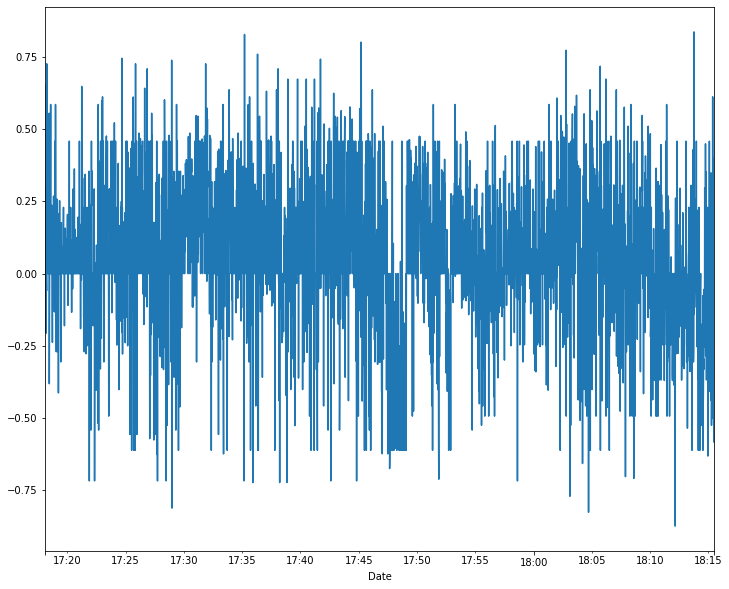

In [8]:
df['comp_score'].plot(figsize=(12,10))

### We use Statsmodel library and import adfuller to do the 
#### Augmented Dicker Fuller Test to see if our dataset is Stationary 

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
adf_test(df['comp_score'])

1. ADF :  -7.568125704257638
2. P-Value :  2.8890666412999027e-11
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression: 3430
5. Critical Values :
	 1% :  -3.4322579302126077
	 5% :  -2.862383013937515
	 10% :  -2.567218751880594


As you can see P-value is under 0.05 so we reject Null hypothesis and the dataset is stationary

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

%matplotlib inline 

### We import ACF and PACF tooks from the statsmodel library and matplot converters to plot some crucial graphs

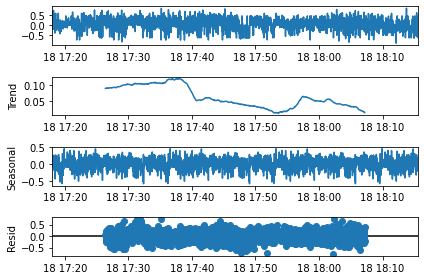

In [21]:
res = sm.tsa.seasonal_decompose(df, period=1000)
resplot = res.plot()
plt.show()

we do seasonal compose to view the plots and see wether there is any pattern we can see, it

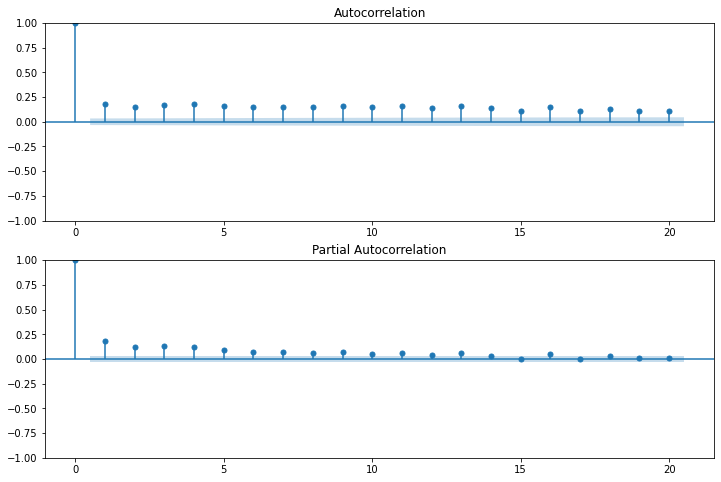

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)

#### This is the ACF and PACF plot as you can see most lags sit outside the confidence interval region, and each lag correlates in time with each other.

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

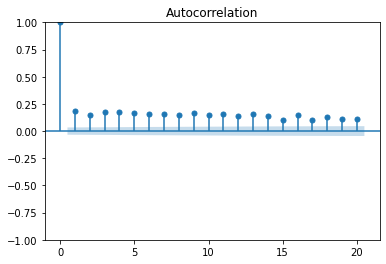

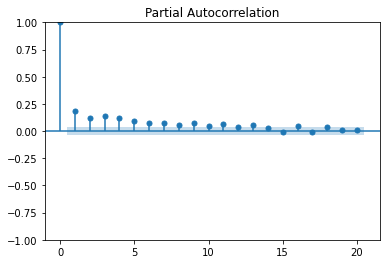

In [24]:
plot_acf(df, ax=None, lags=20, alpha=0.05)
plt.show()
plot_pacf(df, ax=None, lags=20, alpha=0.05)
plt.show()

### We use pmdarima and import auto_arima library to do a stepwise search to minimize AIC and find the best AIC model for our dataset

In [25]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['comp_score'], trace=True,
suppress_warnings=True)
#because our dataset is stationary and non seasonal

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-76.402, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2004.384, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1106.009, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-80.115, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2002.385, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-79.293, Time=1.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-79.344, Time=0.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-78.317, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-82.063, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-81.238, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-81.289, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1104.011, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-80.460, Time=0.65 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.499 seconds


We split out dataset 80% training and 20% test 

In [26]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(3448, 1)
(3418, 1) (30, 1)


#### We import ARIMA from statsmodel to test the new model, SARIMAX gives a summary of the results


In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             comp_score   No. Observations:                 3448
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  43.032
Date:                Sun, 05 Dec 2021   AIC                            -82.063
Time:                        19:46:27   BIC                            -69.773
Sample:                    10-18-2021   HQIC                           -77.673
                         - 10-18-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9303      0.006   -158.415      0.000      -0.942      -0.919
sigma2         0.0571      0.001     51.112      0.000       0.055       0.059
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):               174.41
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.19
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We do an ARIMA model test on our new model

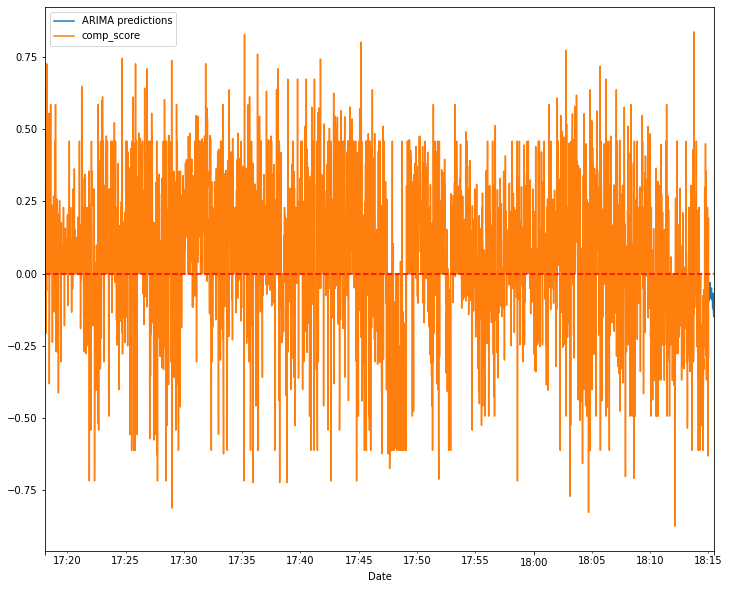

In [28]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True, figsize=(12,10))
train['comp_score'].plot(legend=True)
plt.axhline(y=0.0, color='r', linestyle='--')

These are the predictions made by our ARIMA model -in blue known as ARIMA (ML model) predictions and -in orange is the comp_score which is the actual dataset

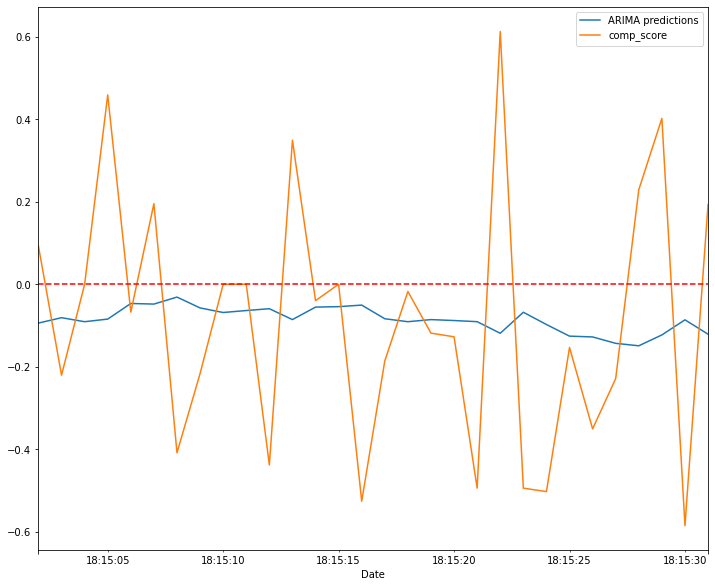

In [29]:
pred.plot(legend='ARIMA Predictions')
test['comp_score'].plot(legend=True, figsize=(12,10))
plt.axhline(y=0.0, color='r', linestyle='--')

These are the predictions made by our ARIMA model -in blue known as ARIMA (ML model) predictions and -in orange is the comp_score which is the actual dataset - this is only on the TEST dataset.


In [30]:
from sklearn import metrics
from math import sqrt
import numpy as np
test['comp_score'].mean()
print('RMSE', np.sqrt(metrics.mean_squared_error(pred, test['comp_score'])))
print('MAE', metrics.mean_absolute_error(pred, test['comp_score'])*100)
print('MSE', metrics.mean_squared_error(pred, test['comp_score']))

RMSE 0.3182693944691863
MAE 25.047529333647123
MSE 0.1012954074557825


### We Import metrics RMSE, MAE, and MSE to evaluate performance of the ARIMA model


In [31]:
model2=ARIMA(df['comp_score'],order=(0,1,1))
model2=model2.fit()
df.tail()

,comp_score
Date,
2021-10-18 18:15:27,-0.228467
2021-10-18 18:15:28,0.228950
2021-10-18 18:15:29,0.401900
2021-10-18 18:15:30,-0.584900
2021-10-18 18:15:31,0.193400


These are the future Forecast Predictions the ARIMA model makes 

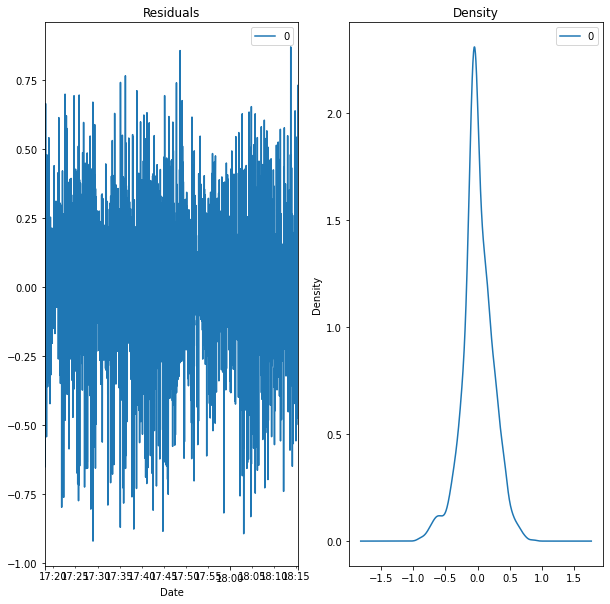

In [33]:
from pandas import DataFrame
from matplotlib import pyplot
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model2.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], figsize=(10,10))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

We import Pandas and Matplotlib to see the residuals and density of the dataset